# Customer Segmentation Using RFM Analysis

This project focuses on customer segmentation using RFM (Recency, Frequency, Monetary) analysis to evaluate customer behavior and loyalty patterns in an e-commerce dataset. The goal is to identify high-value and at-risk customers based on their purchasing history, enabling data-driven marketing and retention strategies.

The dataset contains transactional details such as customer IDs, invoice numbers, purchase dates, and prices. Through RFM computation and scoring, customers are ranked and categorized into loyalty tiers like Platinum, Gold, Silver, and Bronze. These insights help the business allocate resources efficiently, personalize offers, and improve customer lifetime value.

Outline

Step 1: Data Import and Cleaning

Step 2: Exploratory Data Analysis (EDA)

Step 3: Feature Selection for RFM Analysis

Step 4: RFM Metric Calculation (Recency, Frequency, Monetary)

Step 5: Scoring and Ranking Customers

Step 6: Loyalty Segmentation and Visualization

Step 7: Insights and Business Recommendations

In [1]:
# Data Source - https://drive.google.com/drive/folders/10SUoVOHnv95fLr-w2HSktjQUd96jXA3U?usp=sharing
# Data file - https://drive.google.com/file/d/1XvS2y7eA-yPn8aVbfobCQAlMNB06J_wQ/view?usp=drive_link

In [2]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# data import
data = pd.read_csv('/content/drive/MyDrive/Datasets/Input/E-com_Data.csv')
data.shape

(541116, 12)

In [4]:
# Data Sample
data.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [5]:
# Auto EDA library
! pip install ydata-profiling

In [6]:
# generating the report
from ydata_profiling import ProfileReport

report = ProfileReport(data)
report.to_file(output_file = '/content/eda_output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Generates an automated exploratory data analysis (EDA) report using YData Profiling, which summarizes key dataset characteristics such as data types, missing values, distributions, correlations, and outliers. The report is exported as an HTML file for easy visualization, enabling a quick and comprehensive understanding of the dataset before further analysis or preprocessing.

In [7]:
# data sample
data.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [8]:
# For the RFM Analysis we filter the data with needed columns
data = data[['CustomerID', 'InvoieNo', 'Date of purchase', 'Price']]
data.head()

,CustomerID,InvoieNo,Date of purchase,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


Selects only the relevant columns — CustomerID, InvoiceNo, Date of purchase, and Price — required for RFM (Recency, Frequency, Monetary) analysis. This ensures the dataset focuses exclusively on customer transactions necessary for computing purchase frequency, last purchase date, and total spending, eliminating unrelated fields for a cleaner and more efficient analysis.

In [9]:
# Missing value check
round(data.isnull().mean()*100, 2)

,0
CustomerID,25.30
InvoieNo,0.58
Date of purchase,0.58
Price,0.58


Calculates the percentage of missing values in each column to assess data completeness. Identifying null values early ensures that issues such as missing customer IDs or purchase records can be addressed before performing RFM analysis, preventing inaccurate segmentation results.

In [10]:
# Droping the missing values
data = data.dropna(subset=['CustomerID'])
round(data.isnull().mean()*100, 2)

,0
CustomerID,0.0
InvoieNo,0.0
Date of purchase,0.0
Price,0.0


Removes rows with missing CustomerID values, as these entries cannot be linked to any customer and would distort RFM calculations. After this step, the dataset contains only valid, identifiable customer transactions, ensuring accurate segmentation and customer behavior analysis.

In [11]:
# data duplicates
print('Number of duplicates before treating:', data.duplicated().sum())
data = data.drop_duplicates(ignore_index=True)
print('Number of duplicates after treating:', data.duplicated().sum())

Number of duplicates before treating: 1330
Number of duplicates after treating: 0


Detects and removes duplicate transaction records to maintain data integrity. Duplicate entries could lead to inflated purchase frequencies or monetary values, skewing RFM metrics. By eliminating them, each transaction is counted only once, ensuring reliable customer segmentation and accurate business insights.

In [12]:
# data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402859 entries, 0 to 402858
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CustomerID        402859 non-null  float64
 1   InvoieNo          402859 non-null  float64
 2   Date of purchase  402859 non-null  object 
 3   Price             402859 non-null  float64
dtypes: float64(3), object(1)
memory usage: 12.3+ MB


Displays dataset metadata, including column names, data types, and non-null counts. This step confirms that most fields are numerical (float64) while the purchase date is stored as an object. Understanding these data types helps identify which fields need type conversion (e.g., dates) before performing time-based operations in RFM analysis.

In [13]:
# Converting the "Date of purchase" to date data type
import datetime as dt
data['Date of purchase'] = pd.to_datetime(data['Date of purchase'])

# Data type after conversion
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402859 entries, 0 to 402858
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   CustomerID        402859 non-null  float64       
 1   InvoieNo          402859 non-null  float64       
 2   Date of purchase  402859 non-null  datetime64[ns]
 3   Price             402859 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 12.3 MB


Converts the “Date of purchase” column from string to datetime format, enabling proper time-based calculations. This transformation is crucial for computing the Recency metric in RFM analysis, which measures how recently a customer made a purchase. The data type confirmation ensures the column is now compatible with date arithmetic and grouping operations.

In [14]:
# Rename the column
data = data.rename(columns={'InvoieNo': 'InvoiceNo', 'Date of purchase': 'Date'})
data.head()

,CustomerID,InvoiceNo,Date,Price
0,4355.0,398177.0,2017-10-29,1926.0
1,4352.0,394422.0,2017-10-05,1740.0
2,4352.0,394422.0,2017-10-12,1866.0
3,4352.0,388633.0,2017-08-22,1869.0
4,4352.0,394422.0,2017-10-10,1888.0


Renames columns to correct spelling errors and simplify naming for clarity. Standardizing column names like InvoiceNo and Date ensures consistency throughout the analysis pipeline, reducing the risk of errors in aggregation, grouping, or modeling steps during RFM computation.

In [15]:
# description of date columns
data['Date'].describe()

,Date
count,402859
mean,2017-07-15 14:25:02.538605056
min,2016-12-02 00:00:00
25%,2017-04-12 00:00:00
50%,2017-08-05 00:00:00
75%,2017-10-26 00:00:00
max,2017-12-19 00:00:00


Provides a statistical summary of the Date column, including the earliest, latest, and quartile dates. This helps verify the time span of transactions, confirming data coverage from late 2016 to the end of 2017. Understanding the date range is essential for defining the analysis reference point in RFM segmentation.

In [16]:
# Latest date of purcase
latest_date = dt.datetime(2017, 12, 20)
latest_date

datetime.datetime(2017, 12, 20, 0, 0)

# RFM ANALYSIS

In [17]:
RFMScore = data.groupby('CustomerID').agg({'Date': lambda x: (latest_date-x.max()).days,
                                           'InvoiceNo': lambda x: x.count(),
                                           'Price': lambda x: x.sum()})

RFMScore.rename(columns={'Date': 'Recency', 'InvoiceNo': 'Frequency', 'Price': 'Monetory'}, inplace=True)
RFMScore.head()

,Recency,Frequency,Monetory
CustomerID,,,
2.0,4,181,550416.0
3.0,77,27,257404.0
4.0,19,72,176613.0
5.0,311,16,41976.0
6.0,37,84,151822.0


Calculates the RFM metrics — Recency, Frequency, and Monetary — for each customer by aggregating transactions:

Recency: Days since the last purchase.

Frequency: Total number of transactions.

Monetary: Total amount spent.

These three metrics form the foundation for customer segmentation.

Observations:

Customers with low recency (e.g., 4 days) are highly active and recently engaged.

High frequency and monetary values indicate loyal, high-value customers.

Customers with high recency but low frequency suggest dormancy or possible churn risk.

In [18]:
# Converting the data into dataframe with index
RFMScore.reset_index().head()

,CustomerID,Recency,Frequency,Monetory
0,2.0,4,181,550416.0
1,3.0,77,27,257404.0
2,4.0,19,72,176613.0
3,5.0,311,16,41976.0
4,6.0,37,84,151822.0


Resets the index of the RFM table so CustomerID becomes a standard column instead of an index. This makes the dataset easier to manipulate, merge, or export later for visualization or clustering.

The transformed table now clearly displays each customer’s ID alongside their Recency, Frequency, and Monetary scores, ready for further segmentation and scoring analysis.

In [19]:
# Min and Max of each attributes
for cols in RFMScore.columns:
    print(f'For {cols} the min values is {RFMScore[cols].min()} and max value is {RFMScore[cols].max()}')

For Recency the min values is 1 and max value is 381
For Frequency the min values is 1 and max value is 7919
For Monetory the min values is -50372.0 and max value is 35472089.0


Displays the minimum and maximum values for each RFM attribute. This helps identify potential data irregularities — for example, negative monetary values, which might indicate refunds or data entry errors. Understanding these ranges ensures accurate scaling and normalization before applying segmentation or clustering techniques.

In [ ]:
# quantiles for spitting the data
quantile = RFMScore.quantile(q=[0.25,0.5,0.75])
quantile = quantile.to_dict()
quantile

{'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 144.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetory': {0.25: 38140.0, 0.5: 83635.0, 0.75: 205444.0}}

Calculates the 25th, 50th, and 75th percentiles (quartiles) for each RFM variable. These thresholds serve as cut-off points for ranking customers into segments — such as low, medium, and high — based on their purchasing behavior. Using quantiles ensures data-driven segmentation that adapts to the distribution of actual customer activity.

In [21]:
# Function for the scores

# lower the value of recency valuable the customer is

def recency_score(x, q, d):
    # x - condition, q - quantile, d- data
    if x <= d[q][0.25]:
        return 1                # higher rank
    elif x <= d[q][0.50]:
        return 2
    elif x <= d[q][0.75]:
        return 3
    else:
        return 4                # lower rank

# higher the value of frequency and monitory valuable the customer is

def FnM_score(x, q, d):
    # x - condition, q - quantile, d- data
    if x <= d[q][0.25]:
        return 4                # lower rank
    elif x <= d[q][0.50]:
        return 3
    elif x <= d[q][0.75]:
        return 2
    else:
        return 1                # higer rank

Defines two scoring functions to rank customers based on RFM behavior:

recency_score() assigns lower scores (1) to customers who purchased recently and higher scores (4) to those inactive for longer periods, emphasizing recent engagement.

FnM_score() does the opposite for Frequency and Monetary metrics—customers with more transactions or higher spending receive higher ranks (1), identifying them as top-value customers.

These scoring systems standardize different metrics, enabling consistent comparison and segmentation.

In [22]:
# Columns to accomodate the scores from functions
RFMScore['R'] = RFMScore['Recency'].apply(recency_score, args=('Recency', quantile, ))
RFMScore['F'] = RFMScore['Frequency'].apply(FnM_score, args=('Frequency', quantile, ))
RFMScore['M'] = RFMScore['Monetory'].apply(FnM_score, args=('Monetory', quantile, ))

Applies the previously defined scoring functions to calculate R, F, and M scores for each customer. These scores convert raw numerical values into standardized ranks based on quartile thresholds, simplifying comparisons across customers. The resulting R, F, and M columns together represent each customer’s engagement profile, forming the foundation for segmentation and customer-value grouping.

In [23]:
# RFM data
RFMScore.reset_index(inplace=True)
RFMScore.head()

,CustomerID,Recency,Frequency,Monetory,R,F,M
0,2.0,4,181,550416.0,1,1,1
1,3.0,77,27,257404.0,3,3,1
2,4.0,19,72,176613.0,2,2,2
3,5.0,311,16,41976.0,4,4,3
4,6.0,37,84,151822.0,2,2,2


Converts the indexed RFM dataset into a regular DataFrame for easier handling and visualization. The resulting table now includes each customer’s Recency, Frequency, Monetary values along with their corresponding R, F, and M scores, creating a structured foundation for computing combined RFM scores and performing behavioral segmentation.

In [24]:
# Loyality Score
RFMScore['Loyality_Score'] = RFMScore[['R', 'F', 'M']].sum(axis=1)
RFMScore.head()

,CustomerID,Recency,Frequency,Monetory,R,F,M,Loyality_Score
0,2.0,4,181,550416.0,1,1,1,3
1,3.0,77,27,257404.0,3,3,1,7
2,4.0,19,72,176613.0,2,2,2,6
3,5.0,311,16,41976.0,4,4,3,11
4,6.0,37,84,151822.0,2,2,2,6


Creates a Loyalty Score by summing the individual R, F, and M ranks for each customer. A lower total score indicates higher loyalty and engagement (recent, frequent, and high-spending customers), while a higher score suggests lower activity or value. This composite metric simplifies identifying top-performing customers and potential churn risks for targeted marketing strategies.

In [26]:
# Loyality Badge
Loyality = ['Platinum', 'Gold', 'Silver', 'Bronze']
score_cuts = pd.qcut(RFMScore.Loyality_Score, 4, labels= Loyality)
RFMScore['Loyality_Badge'] = score_cuts.values
RFMScore.head()

,CustomerID,Recency,Frequency,Monetory,R,F,M,Loyality_Score,Loyality_Badge
0,2.0,4,181,550416.0,1,1,1,3,Platinum
1,3.0,77,27,257404.0,3,3,1,7,Gold
2,4.0,19,72,176613.0,2,2,2,6,Gold
3,5.0,311,16,41976.0,4,4,3,11,Bronze
4,6.0,37,84,151822.0,2,2,2,6,Gold


Assigns each customer a Loyalty Badge (Platinum, Gold, Silver, Bronze) based on their total Loyalty Score using quartile-based segmentation. This categorization transforms numeric insights into meaningful customer tiers—making it easier to identify premium clients, consistent buyers, and inactive customers for targeted retention, upselling, or re-engagement strategies.

In [27]:
# Export the data
RFMScore.to_csv('/content/segmentation_analysis.csv')

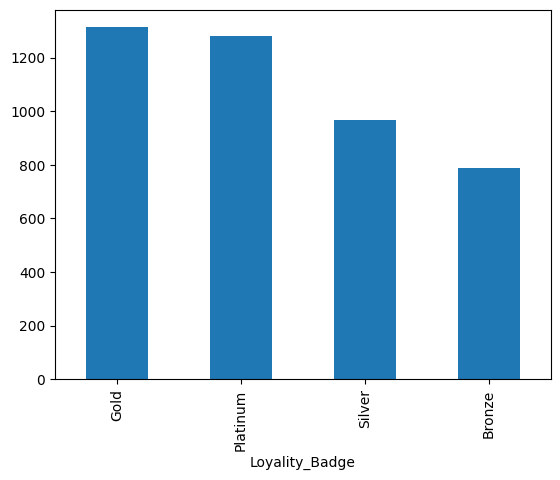

In [32]:
# Data Visualization
RFMScore['Loyality_Badge'].value_counts().plot.bar()
plt.show()

Visualizes the distribution of customers across different Loyalty Badges using a bar chart. The plot highlights which customer segments dominate the base—such as a larger share of Gold and Platinum customers, indicating strong engagement levels. This visualization helps businesses quickly gauge the overall health of their customer base and design tier-specific marketing strategies.